# Regularised Linear Models

### Ridge Regression aka (Tikhonov regularisation)

Ridge regression cost function:
$$ J(\Theta) = MSE(\Theta)+\alpha\frac{1}{2} \sum_{i=1}^{n} \Theta^2_i $$

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

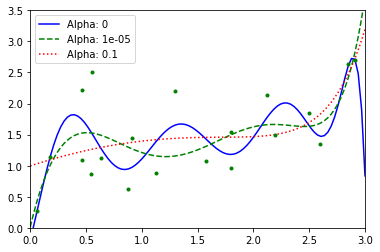

In [18]:
# Ridge regression using close-form solution

from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

for alpha, style in zip((0, 10**-5, 0.1) , ("b-", "g--", "r:")):
    
    model = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("std_scaler", StandardScaler()),
        ("regul_reg", Ridge(alpha, solver="cholesky")),
    ])
    model.fit(X, y)
    y_new_pred = model.predict(X_new)
    plt.plot(X_new, y_new_pred, style, label="Alpha: " + str(alpha))
    

plt.plot(X, y, "g.")
plt.axis([0,3,0,3.5])
plt.legend()

In [5]:
# using stochastic gradient descent

from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

C:\Users\charles.fried\AppData\Local\Continuum\Anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([ 8.19743777])

### Lasso regression

Lasso Regression Cost function:

$$ J(\theta) = MSE(\theta)+\alpha\sum_{i=1}^{n}|\theta_i|$$

In [21]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([ 1.53788174])

### Elastic Net

Elastic net cost function:

$$ J(\theta) = MSE(\theta) + r\alpha \sum_{i=1}^{n} |\theta_j|+ \frac{1-r}{2}\alpha \sum_{i=1}^{n}\theta_i^2 $$

In [22]:
# Elastic net allows us to set a ratio between Ridge and Lasso
# We would prefer Lasso and Elastic if we suspect some features may not be much use
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([ 1.54333232])

### Early stopping

Early stopping simply stops whenever the validation error reaches a minimum

In [ ]:
from sklearn.base import clone
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

sgd_reg = SGDRegressor(max_iter=1, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)
